<h1 align = 'center'> Seaborn tutorial

In [3]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
sns.set()

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<h1 align = 'center'> Seaborn histograms

Histograms, KDE, and Densities

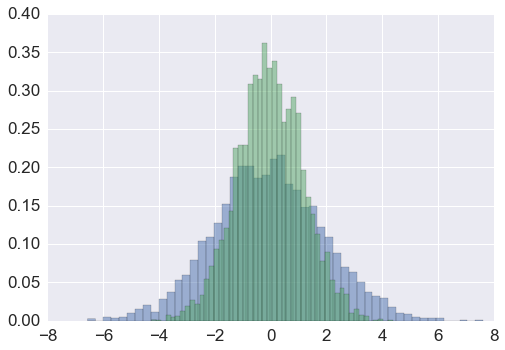

In [110]:
data = np.random.multivariate_normal([0, 0], [[4, 2], [1, 1]], size=4000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5, bins = 50)

kdeplot produces a kernel density estimation for the distribution of your data.

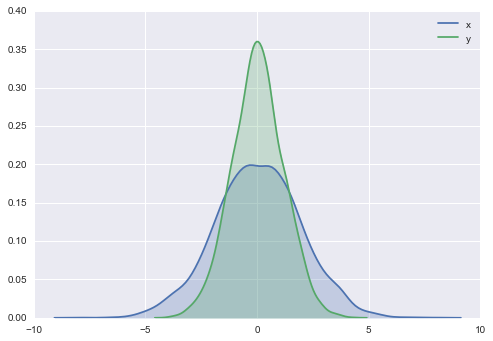

In [5]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using distplot:

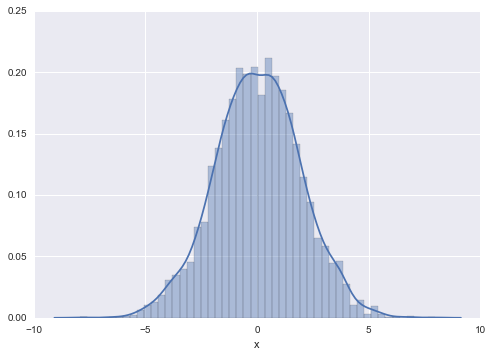

In [6]:
sns.distplot(data['x']);

If we pass the full two-dimensional dataset to kdeplot, we will get a two-dimensional visualization of the data:

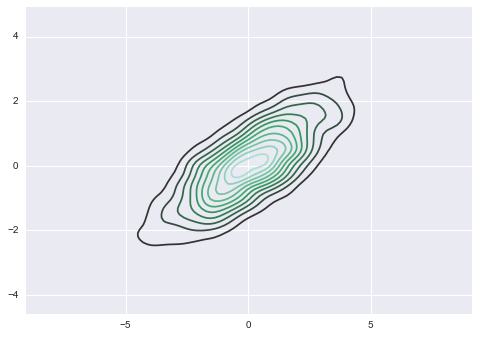

In [7]:
sns.kdeplot(data);

<h1 align = 'center'> Pairplots

Pair plots allow the visualization of all bivariate relationships in a data set at once. In addition to scatter plots they include histograms of single variables.

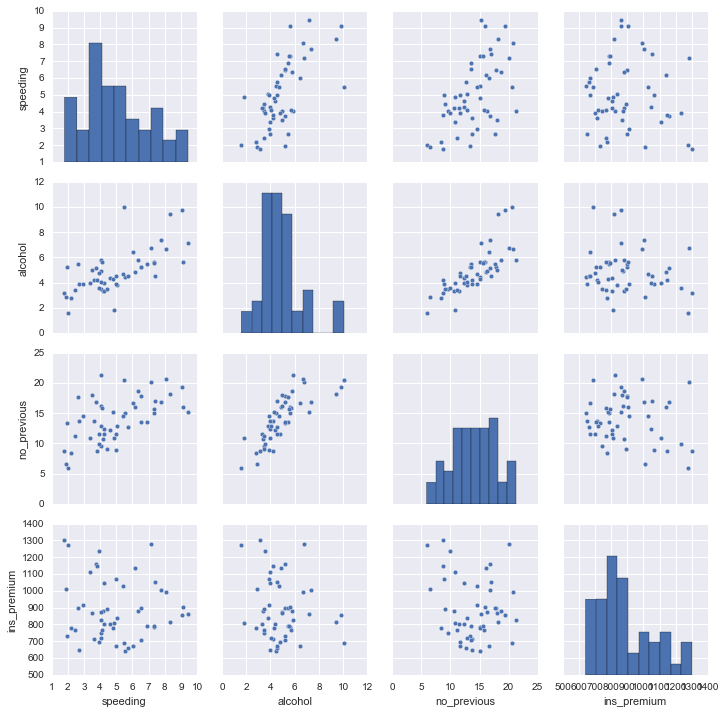

In [34]:
crashes = sns.load_dataset("car_crashes") 
crashes.head()
sns.pairplot(crashes[['speeding', 'alcohol', 'no_previous', 'ins_premium']], 
            size=2.5);

<h1 align = 'center'> Joint Distributions

Joint plots show the joint histogram or relationship between different datasets, as well as univariate distributions:

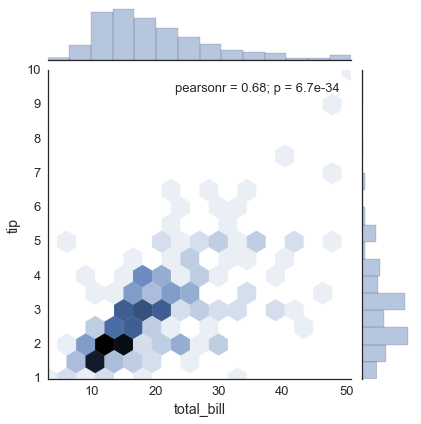

In [55]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind = 'hex')

<h1 align = 'center'> Factorplots

Factorplots are very versatile. They allow us to look at multiple relationships at once and can produce scatter plots, time series, bar plots, box plots, and violin plots.

/usr/local/lib/python2.7/site-packages/seaborn/categorical.py:2653: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


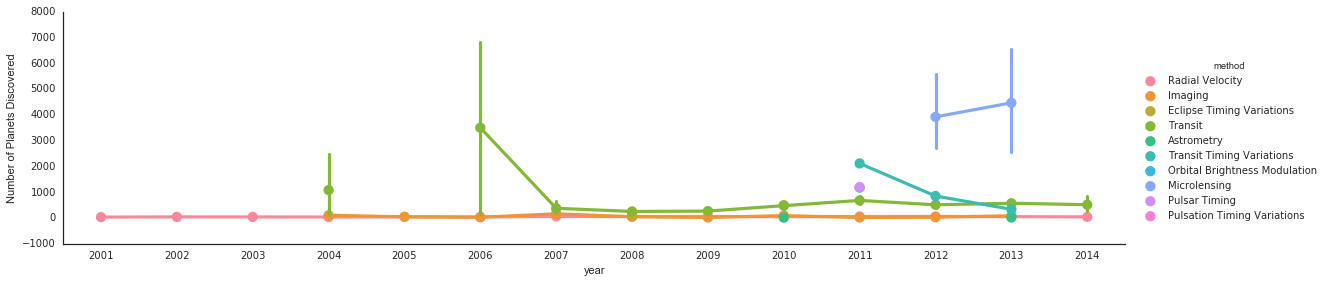

In [17]:
with sns.axes_style('white'):
    g = sns.factorplot("year", 'distance', data=planets, aspect=4.0,
                       hue='method', x_order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

from https://www.oreilly.com/learning/data-visualization-with-seaborn

<h1 align = 'center'> Seaborn settings

There are five seaborn themes that can be set with set_style: darkgrid, whitegrid, dark, white, and ticks. You can remove the lines around the box of the plot (spines) with despine. Offset moves the spine further away from the data, and trim removes extra data points outside of the data range from the spine. Left removes the left spine in addition to the right and top spines.

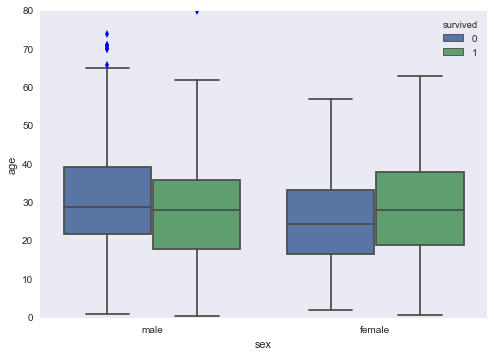

In [44]:
sns.set_style('dark')
sns.boxplot(x = 'sex', y = 'age', hue = 'survived', data=titanic)
sns.despine(offset = 10, trim = True, left = True);

Temporarily change seaborn and matplotlib settings using 'with'. You can change error bar width with lines.width. Change figure size with size option.

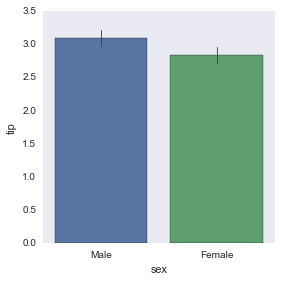

In [46]:
with matplotlib.rc_context({"lines.linewidth": 0.5}):
        fig = sns.factorplot( "sex", "tip", data=tips,
                             kind = 'bar', size = 4,  ci = 68)

You can set context options with sns.set (font size, line widths etc.) and set other options with figure.set (xlim, ylim, xlabel, ylabel). You can assign seaborn figures to a variable that can then be used to set figure options via the pyplot set command.

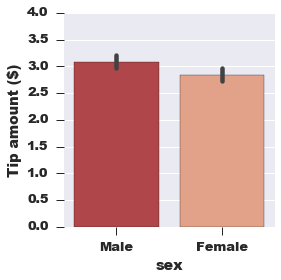

In [56]:
#Other fig.set options
#yticks = (0,2) #set actual tick labels and locations 
#yscale='log' #use logarithmic scale
sns.set(context = "notebook", rc={"lines.linewidth": 2.5}, 
        font = 'Arial Black', font_scale=1.3,
        palette = "RdBu", style = {"xtick.major.size": 8, 
                                   "ytick.major.size": 8})
fig = sns.factorplot( "sex", "tip", data=tips,
                       kind = 'bar', size = 4, ci = 68)
fig.set(ylim = (0,4), ylabel = 'Tip amount ($)');

You can format tick labels with pyplot functions. For example you can set a thousands separator for tick numbers and rotate tick labels, using the pyplot (plt) functions.

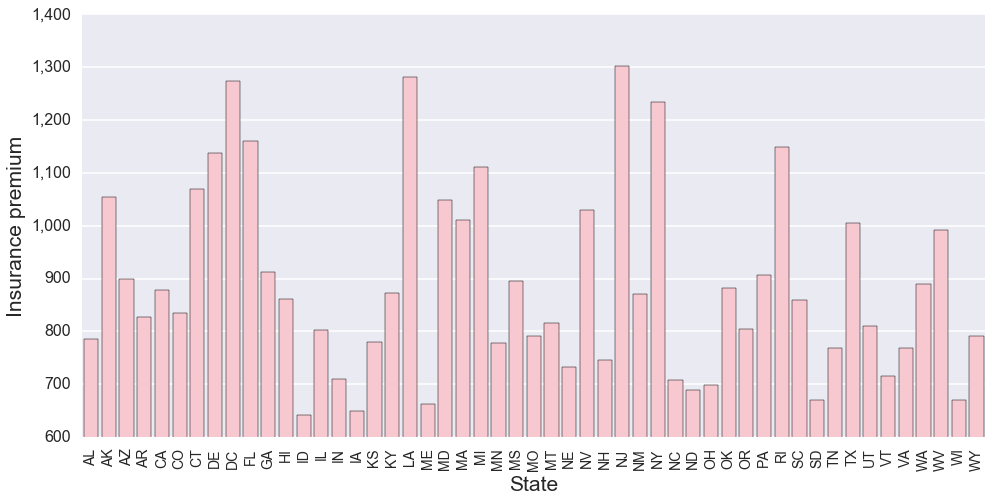

In [48]:
crashes = sns.load_dataset("car_crashes") 
def thousands(x,pos):
    'The two args are the value and tick position'
    return format(int(x), ',')

sns.set(context = 'poster', font = 'Arial', font_scale=1.2)
ax1 = sns.factorplot('abbrev','ins_premium', aspect = 2,
                             data = crashes, color = 'pink',
                             kind = 'bar',size = 7,  ci = None)
#size changes the height
#aspect changes the width relative to the height
ax1.set(ylabel = 'Insurance premium', xlabel = 'State', ylim = (600,1400))
ax1.set_xticklabels(rotation = 90, fontsize = 14)
ax1.set_yticklabels(fontsize = 16)
ax=plt.gca() #get current axis
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(thousands))

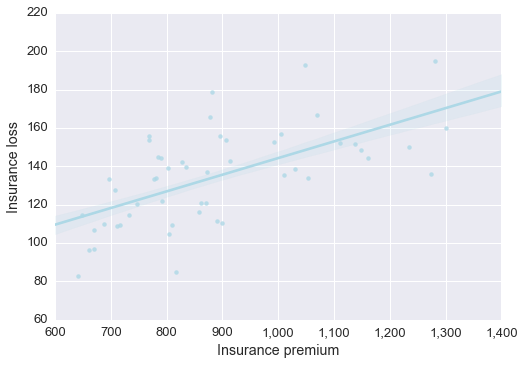

In [57]:
sns.set(font = 'Arial', font_scale=1.3)
ax1 = sns.regplot(  'ins_premium','ins_losses', 
                    data = crashes,
                    color = 'lightblue',
                    ci = 68)
ax1.set(ylabel = 'Insurance loss',
        xlabel = 'Insurance premium')
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(thousands));

You can also format the axes on factorplots separately. Note that to fit the y labels in I had to adjust the space between the plots.

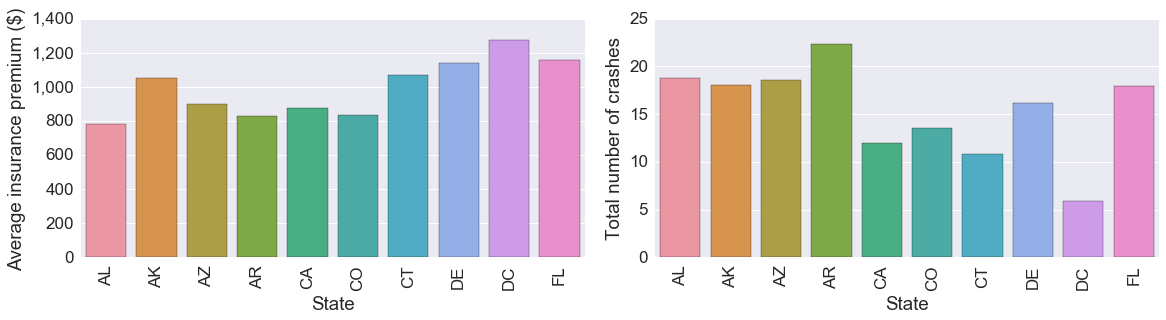

In [105]:
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 0.5})
t = pd.melt(crashes[0:10], id_vars = 'abbrev', value_vars = ['ins_premium', 'total'])
ax1 = sns.factorplot(x = 'abbrev', y = 'value', col = 'variable',
                     data = t, kind = 'bar', 
                     size = 4.5, aspect = 1.8, sharey=False)
ax1.fig.subplots_adjust(hspace=.4, wspace=0.14)
ax1.set_xticklabels(rotation = 90)
ax1.set(ylabel = '', xlabel = 'State', title = '')
axes = ax1.axes
axes[0,0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(thousands))
axes[0,0].set_ylabel('Average insurance premium ($)')
axes[0,1].set_ylabel('Total number of crashes');